```
  /$$$$$$  /$$   /$$ /$$$$$$$   /$$$$$$ 
 /$$__  $$| $$  | $$| $$__  $$ /$$__  $$
| $$  \__/| $$  | $$| $$  \ $$| $$  \ $$
|  $$$$$$ | $$  | $$| $$  | $$| $$  | $$
 \____  $$| $$  | $$| $$  | $$| $$  | $$
 /$$  \ $$| $$  | $$| $$  | $$| $$  | $$
|  $$$$$$/|  $$$$$$/| $$$$$$$/|  $$$$$$/
 \______/  \______/ |_______/  \______/ 


 @Author : Pierre Lague

 @Email : p.lague@sudogroup.fr

 @Date : 04/10/2024

```

# Multi-Target Regression

>@author : Pierre Lague

Multi-target regression, or multi-target regression, deals with problems where the task is to predict multiple continuous target variables. It is simply an extension of traditional regression, which focuses on predicting a single target. In multi-class regression, each target variable is treated as a separate regression problem, and the goal is to create a model that can generate accurate predictions for all target variables simultaneously. **This work resonates with our work if we need to predict a particular class of virtual machine for rightsizing based on quantity/cost/consumed_quantity/number of cpus etc.**

--- 

- **Multiple Target Variables:** In multi-class regression, a specific dataset is used with two or more target variables that we want to predict. These targets can be related or independent, representing different aspects or facets of the problem we are trying to solve.

- **Evaluation Metrics:** Common regression performance metrics such as MSE, MAE, MAPE, R2-score, etc., are used in multi-class regression. It’s important to note that multi-class regression is essentially a straightforward regression task but involves predicting multiple values simultaneously.

- **Challenges:** In this regression task, dealing with datasets with different scales and units for target variables can be challenging. The dataset can become complex because we need to handle correlations between target variables. Additionally, overfitting can be a concern in this task, as predicting multiple targets implies high dimensionality.

In [1]:
import os
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import ElasticNet
from xgboost.sklearn import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

## Toy Example (based on an internet classic)

In [2]:
# Load the Linnerud dataset
linnerud = datasets.load_linnerud()
X, y = linnerud.data, linnerud.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

## Exploratory data Analysis

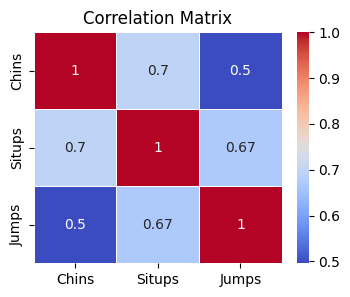

In [3]:
# Create a DataFrame for the Linnerud dataset
df = pd.DataFrame(data=X, columns=linnerud.feature_names)
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap intuitively displays relationships between several features, with each cell labeled with a value, and colors indicating the strength and direction of correlation. This aids in determining the connections between variables in the dataset.
We can see that Chins and Jumps are the least correlated variables where Situps and Jumps are very correlated.

Let's have a look at the distribution of our target variables

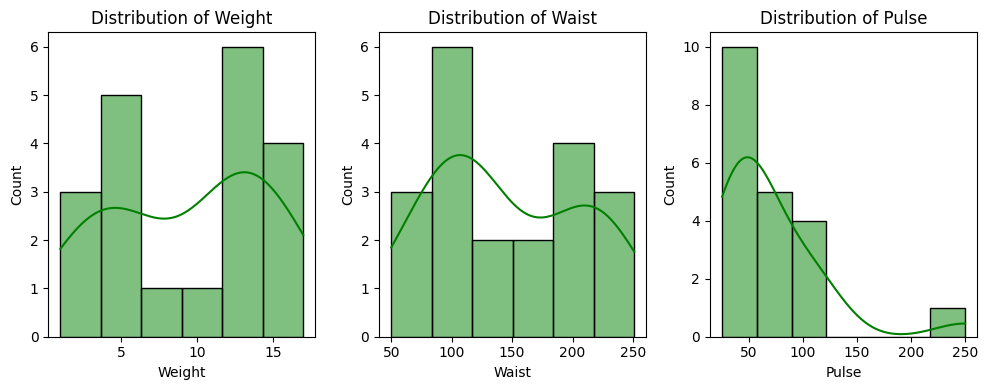

In [4]:
df = pd.DataFrame(data=X, columns=linnerud.target_names)
# Plot the distribution of the target variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Weight'], kde=True, color='green')
plt.title('Distribution of Weight')

plt.subplot(1, 3, 2)
sns.histplot(df['Waist'], kde=True, color='green')
plt.title('Distribution of Waist')

plt.subplot(1, 3, 3)
sns.histplot(df['Pulse'], kde=True, color='green')
plt.title('Distribution of Pulse')

plt.tight_layout()
plt.show()

## Building our models

We propose multiple models to set up a baseline for multi-target regression.

Firstly, the `multioutput_model` adopts ElasticNet regression, configured with specific alpha and L1 ratio values, aiming to simultaneously handle multiple target variables. It works in parallel with five jobs to enhance efficiency. Secondly, the `tree_model` is a DecisionTreeRegressor, a decision tree-based regression model learning the relationship between input features and target variables. Lastly, the `forest_model` is a RandomForestRegressor consisting of 100 decision trees, providing an ensemble regression approach.

These models are trained on the training data and prepared to make predictions on the test data set, enabling the comparison of their performance in predicting target variables. We use the ElasticNet linear model as the base estimator for the multi-target regression model. Setting the n_jobs parameter to 5 means a total of five parallel computations will take place.

Using the wrapper class provided by scikit-learn, `MultiOutputRegressor` extends standard machine learning models to address multi-class problems. It is used together with the ElasticNet regression model in the provided code. Let’s dissect the various parts:

In [6]:
# Create and train the multi-target regression model (ElasticNet)
multioutput_model = MultiOutputRegressor(
    ElasticNet(alpha=0.5, l1_ratio=0.5), n_jobs=5)
multioutput_model.fit(X_train, y_train)

# Create and train the decision tree regressor model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Create and train the random forest regressor model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

As always, it's important to evaluate our model so we will use various metrics : MSA, MAE for each of our models.

In [7]:
# Make predictions
multioutput_pred = multioutput_model.predict(X_test)
tree_pred = tree_model.predict(X_test)
forest_pred = forest_model.predict(X_test)
 
# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_test, multioutput_pred)
multioutput_mae = mean_absolute_error(y_test, multioutput_pred)
multioutput_mape = mean_absolute_percentage_error(y_test, multioutput_pred)
 
# Calculate performance metrics for decision tree model
tree_mse = mean_squared_error(y_test, tree_pred)
tree_mae = mean_absolute_error(y_test, tree_pred)
tree_mape = mean_absolute_percentage_error(y_test, tree_pred)

# Calculate performance metrics for random forest model
forest_mse = mean_squared_error(y_test, forest_pred)
forest_mae = mean_absolute_error(y_test, forest_pred)
forest_mape = mean_absolute_percentage_error(y_test, forest_pred)

# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)
print("Multioutput Model - Mean Absolute Percentage Error:", multioutput_mape)
print("Decision Tree Model - Mean Squared Error:", tree_mse)
print("Decision Tree Model - Mean Absolute Error:", tree_mae)
print("Multioutput Model - Mean Absolute Percentage Error:", tree_mape)
print("Random Forest Model - Mean Squared Error:", forest_mse)
print("Random Forest Model - Mean Absolute Error:", forest_mae)
print("Multioutput Model - Mean Absolute Percentage Error:", forest_mape)

Multioutput Model - Mean Squared Error: 236.22543973611653
Multioutput Model - Mean Absolute Error: 10.015359327324276
Multioutput Model - Mean Absolute Percentage Error: 0.10198002325224738
Decision Tree Model - Mean Squared Error: 371.9166666666667
Decision Tree Model - Mean Absolute Error: 12.083333333333334
Multioutput Model - Mean Absolute Percentage Error: 0.13032370259190704
Random Forest Model - Mean Squared Error: 242.75831666666667
Random Forest Model - Mean Absolute Error: 10.656666666666666
Multioutput Model - Mean Absolute Percentage Error: 0.1042067694557855


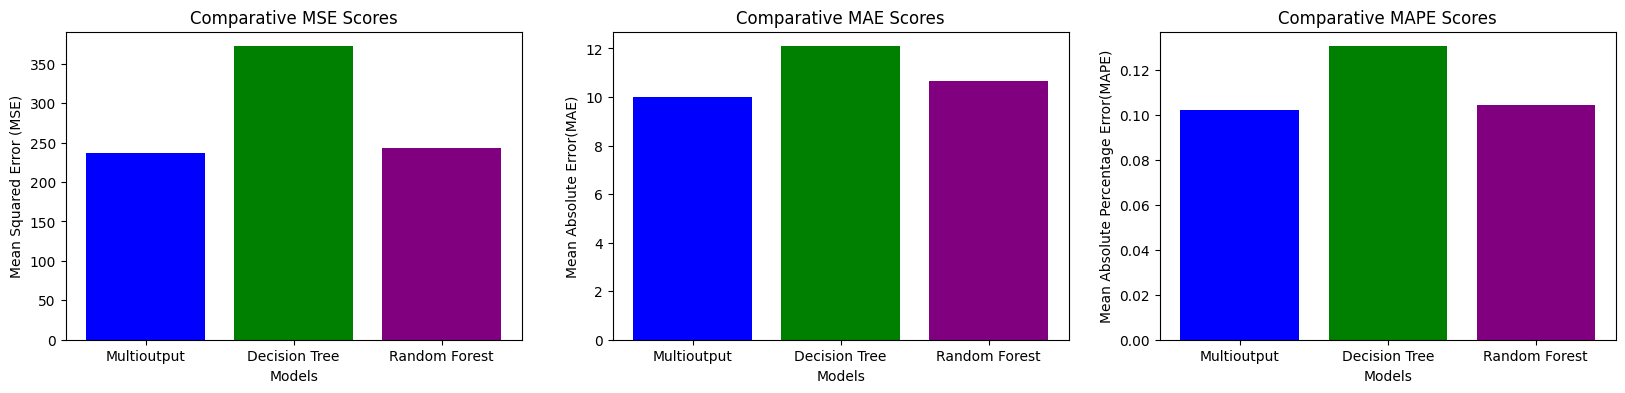

In [8]:
# Create a comparative visualization
plt.figure(figsize=(20, 4))
models = ['Multioutput', 'Decision Tree', 'Random Forest']
mse_scores = [multioutput_mse, tree_mse, forest_mse]
mae_scores = [multioutput_mae, tree_mae, forest_mae]
mape_scores = [multioutput_mape, tree_mape, forest_mape]
 
# Plot Mean Squared Error (MSE)
plt.subplot(1, 3, 1)
plt.bar(models, mse_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparative MSE Scores')

# Plot R-squared Score (R2)
plt.subplot(1, 3, 2)
plt.bar(models, mae_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error(MAE)')
plt.title('Comparative MAE Scores')

# Plot MAPE Score
plt.subplot(1, 3, 3)
plt.bar(models, mape_scores, color=['blue', 'green', 'purple'])
plt.xlabel('Models')
plt.ylabel('Mean Absolute Percentage Error(MAPE)')
plt.title('Comparative MAPE Scores')

plt.show()

For each of the metrics, the multioutput model has the lowest metric out of the three other models.

Tackling multi-output regression tasks is a computationally expensive task, but it is crucial for solving real-world problems. Sklearn’s MultiOutput Regressor even performs well compared to tree-based models. Therefore, this model can be a powerful tool to address the complexity of multi-target regression tasks in a straightforward manner. However, for achieving optimal model performance, further hyperparameter tuning or more in-depth data preprocessing is needed.

# Multi-Target Regression (16 Targets)

Multivariate regression data set from: https://link.springer.com/article/10.1007%2Fs10994-016-5546-z : The Supply Chain Management datasets are derived from the Trading Agent Competition in Supply Chain Management (TAC SCM) tournament from 2010. The precise methods for data preprocessing and normalization are described in detail by Groves and Gini (2011). Some benchmark values for prediction accuracy in this domain are available from the TAC SCM Prediction Challenge (Pardoe and Stone 2008), these datasets correspond only to the Product Future prediction type. Each row corresponds to an observation day in the tournament (there are 220 days in each game and 18 tournament games in a tournament). The input variables in this domain are observed prices for a specific tournament day. In addition, 4 time-delayed observations are included for each observed product and component (1, 2, 4 and 8 days delayed) to facilitate some anticipation of trends going forward. The datasets contain 16 regression targets, each target corresponds to the next day mean price (SCM1D) or mean price for 20-days in the future (SCM20D) for each product in the simulation. Days with no target values are excluded from the datasets (i.e. days with labels that are beyond the end of the game are excluded).



The **MultiOutputRegressor** is an ensemble technique in scikit-learn that allows for the prediction of multiple target variables simultaneously in regression tasks. It works by fitting a separate regression model for each target variable, essentially transforming a multi-output problem into multiple single-output regression problems. This is done by wrapping any regression estimator, such as linear regression or decision trees, and training it independently on each target while sharing the same input features. During prediction, the MultiOutputRegressor generates predictions for all target variables at once, making it efficient for scenarios where outputs are correlated or when multi-task learning is desired. This method enables the leveraging of a variety of regression models while simplifying the process of handling multiple outputs in a unified framework.

In [5]:
file_path = os.path.join("./data/SCM1d_16_target.arff")
dataset = loadarff((file_path))
data = pd.DataFrame(dataset[0])

The targets are the last 16 columns, so we split the dataset at that limit.

In [6]:
y = data.iloc[:, 61:77]
X = data.iloc[:, :61]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=42, shuffle=True)

<Axes: >

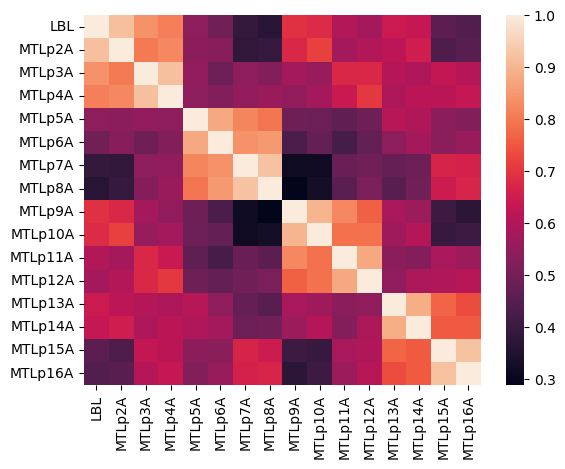

In [8]:
sns.heatmap(y.corr())

MTLp9A seems to have strong correlations with several other variables

LBL appears to have weaker correlations with most other variables.

However, correlation does not imply causation, and additional context about the data and the system it represents would be needed to make definitive statements about variable dependencies. In cloud billing data, the semantic meaning of certain data could be meaningful enough to deduce dependance from the correlation matrix.

Except for the closeness / distance of the values of each target, we cannot say that these targets are inter-dependant. Moreover, the multi-output regressor does not take into account the targets' dependencies and computes a regression model for each target.


We build our model for 16 targets, that maens that for each target we will launch a single XGB regression model. So given the number of targets and the number of features we use, training can be rather long.

In [11]:
multioutput_model_16 = MultiOutputRegressor(
    XGBRegressor(), n_jobs=5)
multioutput_model_16.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...),
                     n_jobs=5)

In [12]:
# Compute predictions on test set
multioutput_pred_16 = multioutput_model_16.predict(X_test)

# Calculate performance metrics for multioutput model
multioutput_mse = mean_squared_error(y_test, multioutput_pred_16)
multioutput_mae = mean_absolute_error(y_test, multioutput_pred_16)
multioutput_mape = mean_absolute_percentage_error(y_test, multioutput_pred_16)
multioutput_r2 = r2_score(y_test, multioutput_pred_16)

In [13]:
# Print the performance metrics
print("Multioutput Model - Mean Squared Error:", multioutput_mse)
print("Multioutput Model - Mean Absolute Error:", multioutput_mae)
print("Multioutput Model - Mean Absolute Percentage Error:", multioutput_mape)
print("Multioutput Model - R2 Score:", multioutput_r2)

Multioutput Model - Mean Squared Error: 10463.160547512853
Multioutput Model - Mean Absolute Error: 70.11591040600632
Multioutput Model - Mean Absolute Percentage Error: 0.04769594078662563
Multioutput Model - R2 Score: 0.8553464412689209


In [14]:
prediction = multioutput_model_16.predict(X_test.head(1))
prediction

array([[1290.6478, 1371.702 , 1347.0146, 1505.772 , 1491.274 , 1522.6986,
        1523.4094, 1689.5548, 1308.3652, 1434.1694, 1448.5247, 1551.3485,
        1565.1139, 1679.9323, 1699.4012, 1800.237 ]], dtype=float32)

We can see that our multi-target regression pipeline allows us to retrieve at the same time all 16 predictions on the 16 targets. Addtionnaly the XGBRgressor outputs a R2 Score of 85 which means that 85% of the total variance of the data (which is almost 60 features and 8k rows) is explained by our model when predicting the 16 targets.

Again, these results are quite promising for a multi-target regression tasak in the case of choosing which kind of resources/VM a client should choose based on the data we have in a cloud bill of the month n-1